In [1]:
import math
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt


def simulation(network):
    p = 0
    my_list = []
    my_reduced_list = []

    while p < 1:
        is_reduced = 0
        for j in nx.edges(network):
            if random.random() < p:
                network.remove_edge(j[0], j[1])

        matrix = nx.adjacency_matrix(network).todense()
        if np.allclose(matrix, np.tril(matrix)) \
                or np.allclose(matrix, np.triu(matrix)) \
                or np.allclose(matrix, np.diag(matrix)):
            is_reduced += 1

        my_reduced_list.append(is_reduced)
        my_list.append(p)
        p += 0.01

    return [my_list, my_reduced_list]


def plot(p_list, is_reduced_list_p, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(p_list, is_reduced_list_p)
    plt.title(title)
    plt.ylabel('irreducibility')
    plt.xlabel('Probability')
    ax.grid()
    plt.savefig('./phase1/1/' + title + '.png')
    plt.show()


def erdos_renyi_test(number_of_node, probability_of_edge, number_of_simulation):
    erdos_network = nx.erdos_renyi_graph(number_of_node, probability_of_edge)
    [p_list, is_reduced_list_sum] = simulation(erdos_network)
    for i in range(1, number_of_simulation):
        erdos_network = nx.erdos_renyi_graph(number_of_node, probability_of_edge)
        [p_list, is_reduced_list] = simulation(erdos_network)
        is_reduced_list_sum = np.add(is_reduced_list, is_reduced_list_sum)
    plot(p_list, 1 - (is_reduced_list_sum / number_of_simulation), 'Erdos_Renyi')


def watts_strogatz_test(number_of_node, number_of_edge, probability_of_edge, number_of_simulation):
    watts_network = nx.watts_strogatz_graph(number_of_node, number_of_edge, probability_of_edge)
    [p_list, is_reduced_list_sum] = simulation(watts_network)
    for i in range(1, number_of_simulation):
        watts_network = nx.watts_strogatz_graph(number_of_node, number_of_edge, probability_of_edge)
        [p_list, is_reduced_list] = simulation(watts_network)
        is_reduced_list_sum = np.add(is_reduced_list, is_reduced_list_sum)
    plot(p_list, 1 - (is_reduced_list_sum / number_of_simulation), 'Watts-Strogatz')


def barabasi_albert_test(number_of_node, number_of_edge, number_of_simulation):
    barabasi_network = nx.barabasi_albert_graph(number_of_node, number_of_edge)
    [p_list, is_reduced_list_sum] = simulation(barabasi_network)

    for i in range(1, number_of_simulation):
        barabasi_network = nx.barabasi_albert_graph(number_of_node, number_of_edge)
        [p_list, is_reduced_list] = simulation(barabasi_network)
        is_reduced_list_sum = np.add(is_reduced_list, is_reduced_list_sum)

    plot(p_list, 1 - (is_reduced_list_sum / number_of_simulation), 'Barabasi-Albert')

def calculation_eq3(network):
    # print("calculation")
    p = 0
    p_list = []
    res_list = []

    while p < 1:
        p_list.append(p)
        prob_e = eq3(network, p)
        res_list.append(prob_e)
        p += 0.01
        # while_end

    return [p_list, res_list]


def eq3(network, p):
    # print('eq3 ', p)
    p_ki = 0
    for i in nx.degree(network):
        p_ki += p ** i[1]

    prob = -(1 - p) * p_ki
    prob_e = math.e ** prob

    # print(prob_e)
    return prob_e


def plot_irreducibility(my_list, out_list, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(my_list, out_list)
    plt.title(title + ' network(irreducibility)')
    plt.ylabel('irreducibility')
    plt.xlabel('probability')
    ax.grid()
    plt.savefig('phase1/2/3/'+title+'.png')
    plt.show()


def calculation_eq6(network):
    # print("calculation")
    p = 0
    p_list = []
    res_list = []

    while p < 1:
        p_list.append(p)
        out_g = eq6(network, p)
        res_list.append(1 - out_g)
        p += 0.01
        # while_end

    return [p_list, res_list]


def eq6(network, p):
    print('eq6 ', p)
    out_g = 0
    for j in range(nx.number_of_nodes(network)):
        cut = 0

        for n in list(nx.all_node_cuts(network)):
            if len(n) == j:
                cut += 1

        out_g += cut * (p ** j) * ((1 - p) ** (nx.number_of_nodes(network) - j))

    # print(out_g)
    return out_g


def plot_reliability(my_list, out_list, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(my_list, out_list)
    plt.title(title + ' network(reliability)')
    plt.ylabel('reliability')
    plt.xlabel('probability')
    ax.grid()
    plt.savefig('phase1/2/6/'+title+'.png')
    plt.show()


In [2]:
#init network
number_of_nodes = 50
p_graph = 0.2
deg = 10
number_of_simulations = 1000

C:\Users\samir\AppData\Local\Temp\ipykernel_12576\1780809288.py:19: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  matrix = nx.adjacency_matrix(network).todense()
C:\Users\samir\AppData\Local\Temp\ipykernel_12576\1780809288.py:19: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  matrix = nx.adjacency_matrix(network).todense()


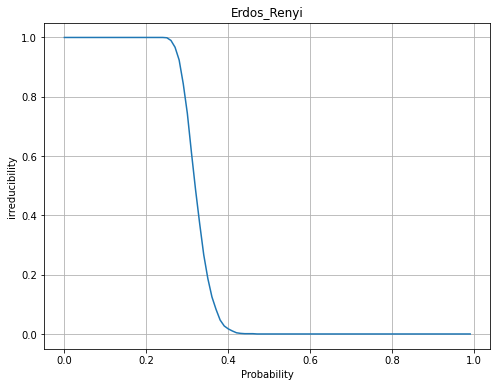

In [3]:
erdos_renyi_test(number_of_nodes, p_graph, number_of_simulations)

In [4]:
erdos_network = nx.erdos_renyi_graph(number_of_nodes, p_graph)

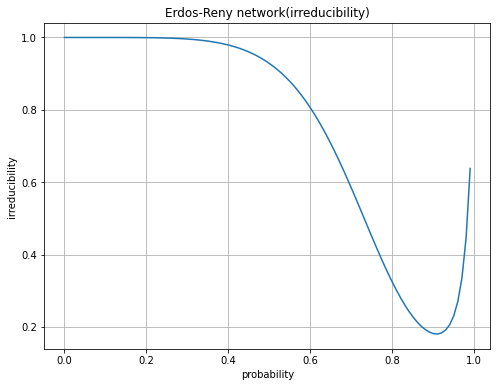

In [5]:
[e_list, eq3_list] = calculation_eq3(erdos_network)
plot_irreducibility(e_list, eq3_list, 'Erdos-Reny')

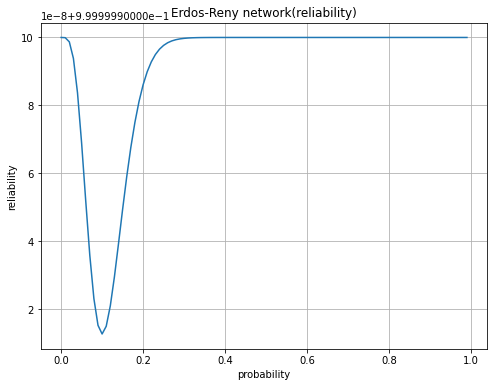

In [6]:
[e_list, eq6_list] = calculation_eq6(erdos_network)
plot_reliability(e_list, eq6_list, 'Erdos-Reny')